# 3.	Qual o impacto do shipping cost e do discount sobre as vendas? Para aumentar as vendas em qual você recomendaria investir?

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [400]:
df = pd.read_csv("superstore_dataset2011-2015.csv",encoding = "ISO-8859-1")

In [401]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

## Desconto

In [404]:
# Criação da Variável booleana do desconto
df["bool_Discount"] = [0 if (i == 0) else 1 for i in df.Discount]

In [405]:
#Agrupando os descontos 
desconto = df.groupby(['bool_Discount','Order Date'])['Sales','Quantity'].sum().reset_index()
desconto.sort_values(by='Order Date', inplace = True)
desconto.set_index('Order Date', inplace = True)

# Criando um dataset para as ordens que possuem descontos e outro dataset pra quem não possui
com_desc = desconto[desconto['bool_Discount'] == 1]
sem_desc = desconto[desconto['bool_Discount'] == 0]

<ipython-input-405-718de02d29e1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  desconto = df.groupby(['bool_Discount',"Order Date"])['Sales','Quantity'].sum().reset_index()


Note que no gráfico abaixo existem 3 "agrupamentos" de descontos

(array([ 611., 5344., 5237.,  755., 3477., 2685.,   22., 2046., 1786.,
         318.]),
 array([0.002 , 0.0868, 0.1716, 0.2564, 0.3412, 0.426 , 0.5108, 0.5956,
        0.6804, 0.7652, 0.85  ]),
 <a list of 10 Patch objects>)

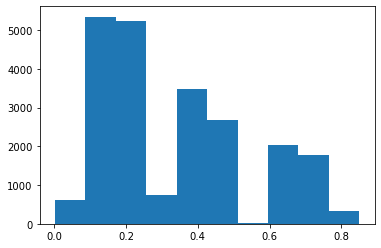

In [415]:
# Visualizando a distribuição dos descontos
plt.hist(x='Discount', data=com_d, bins=10)

(array([3233., 5588., 4578., 2731., 2279., 1339., 1101.,  592.,  458.,
         117.,   72.,   71.,   39.,   83.]),
 array([ 1.        ,  1.92857143,  2.85714286,  3.78571429,  4.71428571,
         5.64285714,  6.57142857,  7.5       ,  8.42857143,  9.35714286,
        10.28571429, 11.21428571, 12.14285714, 13.07142857, 14.        ]),
 <a list of 14 Patch objects>)

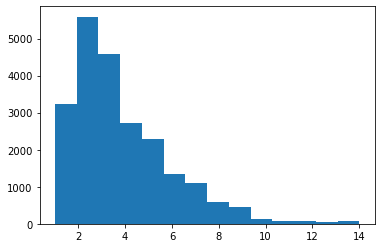

In [416]:
# Visualizando a distribuição da quantidade de itens para as ordens com desconto
plt.hist(x='Quantity',data=com_d,bins=14)

No gráfico abaixo podemos notas que não há uma relação clara entre desconto e quantidade de itens.

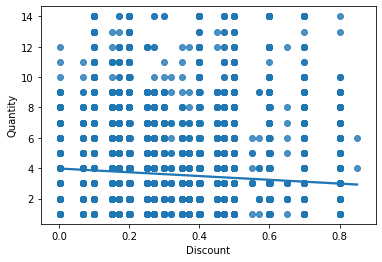

In [418]:
sns.regplot("Discount",'Quantity',data=com_d)

Com base no histograma do descontos iremos criar uma variável categórica para o desconto.

In [447]:
def categorias(val):
    if (val > 0) & (val <= 0.25):
        return "0.01 - 0.25"
    elif (val > 0.25) & (val <= 0.50):
        return "0.26 - 0.50"
    elif (val > 0.5) :
        return "0.51 - 1"
    elif val == 0:
        return '0.0'

df['cat_Des'] = df['Discount'].apply(categorias)

Note na tabela abaixo que para as ordens sem desconto e para as ordens com desconto até de 25% o lucro é positivo

In [425]:
desc = df.groupby(['cat_Des'])['Sales','Quantity','Profit'].sum().reset_index()
desc.set_index('cat_Des',inplace=True)
desc

<ipython-input-425-c819706aa2ae>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  desc = df.groupby(['D'])['Sales','Quantity','Profit'].sum().reset_index()


,Sales,Quantity,Profit
D,,,
0.0,6.992411e+06,98768,1.770695e+06
0.01 - 0.25,3.824151e+06,41962,5.116494e+05
0.26 - 0.50,1.454315e+06,25713,-4.023057e+05
0.51 - 1,3.716247e+05,11869,-4.125817e+05


Nesta próxima tabela avaliamos as medidas médias para vendas, lucro e quantidade de produto.

- A classe sem descontos possui um lucro médio maior porém perde para a classe de descontos de até 25% em Vendas médias e itens.

In [448]:
te = df.groupby(['cat_Des'])['Sales','Quantity','Profit'].mean().reset_index()
te

<ipython-input-448-bb8734734095>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  te = df.groupby(['cat_Des'])['Sales','Quantity','Profit'].mean().reset_index()


,cat_Des,Sales,Quantity,Profit
0,0.0,241.042813,3.404736,61.039514
1,0.01 - 0.25,341.686131,3.749285,45.715638
2,0.26 - 0.50,210.252295,3.717363,-58.161883
3,0.51 - 1,89.075902,2.844919,-98.893015


(-1.109834755393806,
 1.1004683216854194,
 -1.1326221300121493,
 1.1122717231332497)

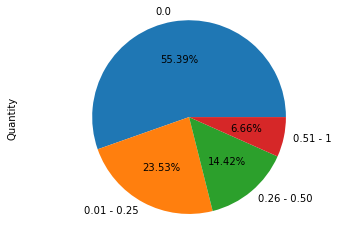

In [449]:
# Rosca da quantidade total por classe de desconto
desc.Quantity.plot(kind='pie',  autopct='%.2f%%')
plt.axis('equal')  

(-1.1100311575283448,
 1.1004776745454934,
 -1.11323170363925,
 1.1113746091309415)

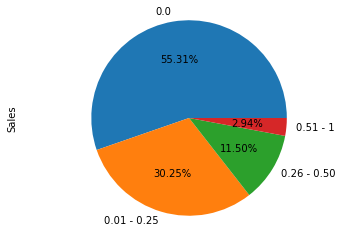

In [450]:
# Rosca das vendas totais por classe de desconto

desc.Sales.plot(kind='pie',  autopct='%.2f%%')
plt.axis('equal')  

# Shipping Cost

Conforme o frete aumenta a quantidade de vendas cai

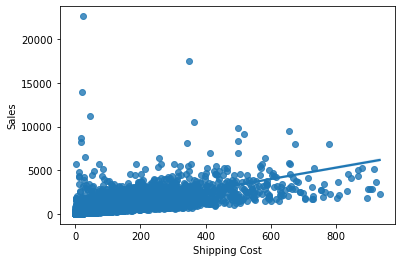

In [343]:
sns.regplot('Shipping Cost','Sales',data=df)

In [432]:
# Criando uma variável que contém o percentual do preço do frete sobre a venda
df['Per_ship'] = (df['Shipping Cost'] / df['Sales'])

Na próxima figura podemos ver a dispersão do percentual do frete sobre a venda 

(array([1.0858e+04, 2.3612e+04, 9.7680e+03, 3.7950e+03, 1.7840e+03,
        9.2400e+02, 3.8600e+02, 1.2700e+02, 3.2000e+01, 4.0000e+00]),
 array([0.        , 0.05896377, 0.11792754, 0.17689131, 0.23585508,
        0.29481885, 0.35378262, 0.41274639, 0.47171016, 0.53067393,
        0.5896377 ]),
 <a list of 10 Patch objects>)

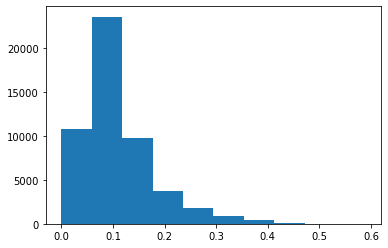

In [398]:
plt.hist(x='Per_ship', data=df, bins=10)

Criamos uma variável categórica para as porcentagens 

In [439]:
def categorias_ship(val):
    if (val > 0) & (val <= 0.10):
        return "0.0 - 0.10"
    elif (val > 0.10) & (val <= 0.20):
        return "0.11 - 0.20"
    elif (val > 0.20) & (val <= 0.30):
        return "0.21 - 0.30"
    elif (val > 0.30):
        return "0.31 - 0.60"

df['cat_ship'] = df['Per_ship'].apply(categorias_ship)

In [440]:
ship_sum = df.groupby(['cat_ship'])['Sales','Quantity','Profit'].sum().reset_index()
ship_sum.set_index('cat_ship', inplace=True)
ship_sum

<ipython-input-440-d64fca356769>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ship_sum = df.groupby(['cat_ship'])['Sales','Quantity','Profit'].sum().reset_index()


,Sales,Quantity,Profit
cat_ship,,,
0.0 - 0.10,7.302394e+06,102136,858718.59478
0.11 - 0.20,4.139277e+06,58400,472005.14778
0.21 - 0.30,8.949132e+05,13167,92026.17144
0.31 - 0.60,3.058429e+05,4604,44703.17728


(-1.1048117290789508,
 1.1002291299561404,
 -1.1087928846662656,
 1.1105787525762116)

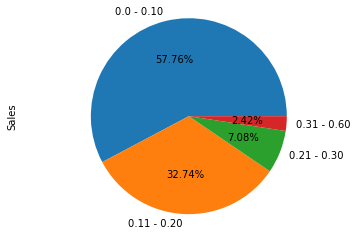

In [441]:
# Total de vendas por categoria de frete
ship_sum.Sales.plot(kind='pie',  autopct='%.2f%%')
plt.axis('equal')  

(-1.1011704453815945,
 1.1000557354943616,
 -1.1119562615991871,
 1.1096611492380615)

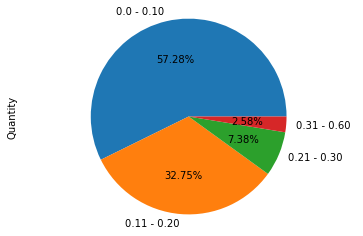

In [442]:
# Total de itens por categoria de frete
ship_sum.Quantity.plot(kind='pie',  autopct='%.2f%%')
plt.axis('equal') 

(-1.10920191739464, 1.1004382033640756, -1.104684289056611, 1.111732283580754)

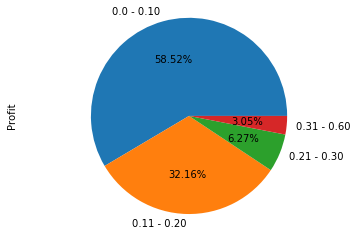

In [454]:
# Total de lucros por categoria de frete
ship_sum.Profit.plot(kind='pie',  autopct='%.2f%%')
plt.axis('equal') 

Mesma análise, mas agora olhando para os valores médios

In [443]:
ship_mean = df.groupby(['cat_ship'])['Sales','Quantity','Profit'].mean().reset_index()
ship_mean.set_index('cat_ship',inplace=True)
ship_mean

<ipython-input-443-a3ebf75a2679>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ship_mean = df.groupby(['cat_ship'])['Sales','Quantity','Profit'].mean().reset_index()


,Sales,Quantity,Profit
cat_ship,,,
0.0 - 0.10,249.833855,3.494338,29.378993
0.11 - 0.20,245.174274,3.459101,27.957422
0.21 - 0.30,234.885361,3.455906,24.153851
0.31 - 0.60,223.896676,3.370425,32.725606


Podemos dizer que a venda, quantidade e lucro médio sobem linearmente conforme o percentual do frete aumenta.